<a href="https://colab.research.google.com/github/doandongdu/DUDOAN12/blob/main/Potatal_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
train_image_files_path = '/content/drive/MyDrive/AI/Potatal/Data/Train'
valid_image_files_path = '/content/drive/MyDrive/AI/Potatal/Data/Validation'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1/255)
validation_data_gen = ImageDataGenerator(rescale = 1/255)

In [5]:
train_generator = train_data_gen.flow_from_directory(train_image_files_path, target_size = (200,200), class_mode = 'categorical')

Found 315 images belonging to 3 classes.


In [6]:
x_train,y_train = next(train_generator)

In [7]:
x_train.shape

(32, 200, 200, 3)

In [8]:
y_train.shape

(32, 3)

In [9]:
x_train = x_train.reshape(32,120000)
x_train = x_train.astype ('float32')
x_train = x_train/255
x_train.shape

(32, 120000)

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.fit(x_train, y_train, epochs = 500, batch_size = 128)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 1.0990 - accuracy: 0.2500
Epoch 2/500
1/1 [==============================] - 1s 552ms/step - loss: 2.4883 - accuracy: 0.4062
Epoch 3/500
1/1 [==============================] - 1s 549ms/step - loss: 3.1107 - accuracy: 0.3438
Epoch 4/500
1/1 [==============================] - 1s 528ms/step - loss: 1.1863 - accuracy: 0.3750
Epoch 5/500
1/1 [==============================] - 1s 548ms/step - loss: 0.9997 - accuracy: 0.4062
Epoch 6/500
1/1 [==============================] - 1s 534ms/step - loss: 0.9748 - accuracy: 0.7188
Epoch 7/500
1/1 [==============================] - 1s 530ms/step - loss: 0.9561 - accuracy: 0.4062
Epoch 8/500
1/1 [==============================] - 1s 541ms/step - loss: 0.9395 - accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 1s 527ms/step - loss: 0.9233 - accuracy: 0.4375
Epoch 10/500
1/1 [==============================] - 1s 612ms/step - loss: 0.9074 - accuracy: 0.7188
Epoch 11/500

In [13]:
model.save('potato.h5')

In [14]:
label = ['bệnh bạc lá','khỏe mạnh','bệnh sương mai']

1/1 [==============================] - 0s 49ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 47ms/step
Tình trạng: bệnh bạc lá


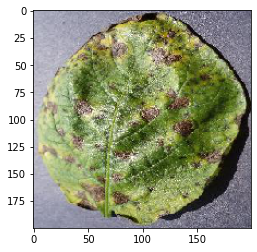

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/AI/Potatal/Data/Train/early-blight/0a79700b-f834-41f5-ae51-6ceda6f67a48___RS_Early.B 8951.JPG', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img = img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis = 1))
print("Tình trạng:", label[a])

1/1 [==============================] - 1s 519ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 186ms/step
Tình trạng: khỏe mạnh


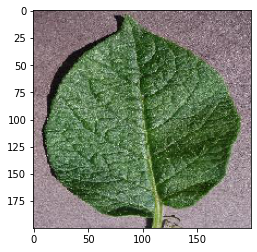

In [15]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/AI/Potatal/Data/Train/healthy/046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img = img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis = 1))
print("Tình trạng:", label[a])

1/1 [==============================] - 0s 45ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 46ms/step
Tình trạng: bệnh sương mai


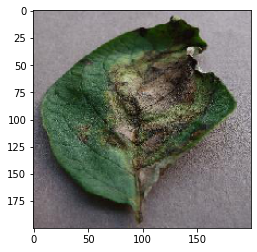

In [16]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/AI/Potatal/Data/Train/late-blight/0c2628d4-8d64-48a9-a157-19a9c902e304___RS_LB 4590.JPG', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img = img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis = 1))
print("Tình trạng:", label[a])

1/1 [==============================] - 0s 62ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 60ms/step
Tình trạng: bệnh bạc lá


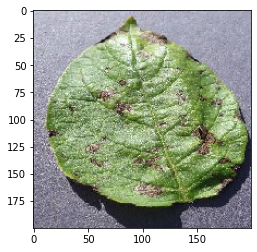

In [17]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/AI/Potatal/Data/Train/early-blight/0c4f6f72-c7a2-42e1-9671-41ab3bf37fe7___RS_Early.B 6752.JPG', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img = img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis = 1))
print("Tình trạng:", label[a])

1/1 [==============================] - 0s 63ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 47ms/step
Tình trạng: khỏe mạnh


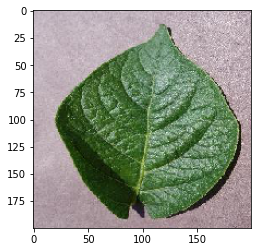

In [18]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/AI/Potatal/Data/Train/healthy/9a6eb7c4-6b43-477a-89e0-69f62ef67991___RS_HL 1846.JPG', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img = img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis = 1))
print("Tình trạng:", label[a])

1/1 [==============================] - 0s 47ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 44ms/step
Tình trạng: bệnh sương mai


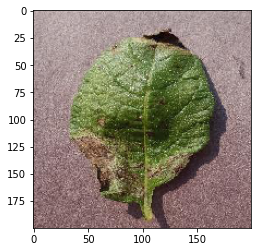

In [19]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/AI/Potatal/Data/Train/late-blight/00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img = img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis = 1))
print("Tình trạng:", label[a])